1.读取数据

In [337]:
d1,d2=400,1600
w1,w2=80,80

import pickle
import sys

def read_data(D,W):
    '''
    通过D,和W的大小来区分和读取数据，并返回四个数据结果。
    '''
    name=sys.path[0]+'\data\\'+'D='+str(d1)+'-'+str(d2)+'_W='+str(w1)+'-'+str(w2)+".bin"

    with open(name,'rb') as file:
        move_datas=pickle.load(file)
    
    return move_datas

mouse_move=read_data(D,W)

2.将轨迹数据转换为pd.DataFrame格式

In [338]:
import pandas as pd

Track={}
for i in range(len(mouse_move)):
    Track[i]=pd.DataFrame(mouse_move[i])
    Track[i].columns=['t','x','y']


3.计算轨迹数据中的其他相关项（速度，角度，距离）

#进行y方向平滑处理

In [339]:
import numpy as np


screen_wide=2560
screen_high=1600

def setValue(Track):
    '''
        计算速度和时间
    '''
    trace=[]
    for i in range(len(Track)):
        T=Track[i].t.values.tolist()
        X=Track[i].x.values.tolist()
        Y=Track[i].y.values.tolist()
        
        #将时间标准化
        t0=T[0]
        for i in range(len(T)):
            T[i]=T[i]-t0
        
        index=[0,]
        for i in range(1,len(Y)-1):
            if Y[i]==Y[i-1] and Y[i]!=Y[i+1]:
                index.append(i+1)
        index.append(len(Y)-1)
        
        Y_new=Y.copy()#对Y进行插值,对Y进行线性平滑
        for i in range(len(index)-1):
            for j in range(index[i],index[i+1]):
                k=(Y[index[i+1]]-Y[index[i]])/(T[index[i+1]]-T[index[i]]+1)
                Y_new[j]=Y[index[i]]+k*(T[j]-T[index[i]])
            
        divoce=T[-1]/len(T)#防止除零错误
        s=0
        S=[0,]#点在轨迹上的位置
        for i in range(1,len(X)):
            s+=np.sqrt((X[i]-X[i-1])**2+(Y_new[i]-Y_new[i-1])**2)
            S.append(s)
        
        v_x=[0,]
        for i in range(1,len(X)):
            if (T[i]-T[i-1])==0:
                v_x.append((X[i]-X[i-1])/divoce)
            else:
                v_x.append((X[i]-X[i-1])/(T[i]-T[i-1]))
            
        v_y=[0,]
        for i in range(1,len(Y)):
            if (T[i]-T[i-1])==0:
                v_y.append((Y[i]-Y_new[i-1])/divoce)
            else:
                v_y.append((Y[i]-Y_new[i-1])/(T[i]-T[i-1]))
            
        v=[0,]
        for i in range(1,len(v_x)):
            
            v.append(np.sqrt((v_x[i])**2+(v_y[i])**2))
        
        x_y=[]
        for i in range(len(X)):
            x_y.append((X[i]/screen_wide)/(Y[i]/screen_high)-(X[0]/screen_wide)/(Y[0]/screen_high))
            
        pandasDataSet=[]
        for i in range(len(X)):
            pandasDataSet.append((T[i],X[i],Y[i],S[i],v_x[i],v_y[i],v[i],Y_new[i],x_y[i]))
        
        trace.append(pd.DataFrame(pandasDataSet,columns=['t','x','y','s','v_x','v_y','v','y_new','x_y']))
        
    return trace

Track=setValue(Track)
print(Track[0].head(5))


     t       x      y    s  v_x  v_y    v  y_new  x_y
0  0.0  1092.0  800.0  0.0  0.0  0.0  0.0  800.0  0.0
1  0.0  1092.0  800.0  0.0  0.0  0.0  0.0  800.0  0.0
2  0.0  1092.0  800.0  0.0  0.0  0.0  0.0  800.0  0.0
3  0.0  1092.0  800.0  0.0  0.0  0.0  0.0  800.0  0.0
4  0.0  1092.0  800.0  0.0  0.0  0.0  0.0  800.0  0.0


4.绘制图像函数

In [340]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d


def plotdata(Track,x,y):
    colors = [
    ('red', '#FF0000'),
    ('lime', '#00FF00'),
    ('blue', '#0000FF'),
    ('yellow', '#FFFF00'),
    ('cyan', '#00FFFF'),
    ('magenta', '#FF00FF'),
    ('orange', '#FFA500'),
    ('darkred', '#8B0000'),
    ('darkgreen', '#006400'),
    ('darkblue', '#00008B'),
    ('darkgoldenrod', '#B8860B'),
    ('purple', '#800080'),
    ('hotpink', '#FF69B4'),
    ('teal', '#008080'),
    ('silver', '#C0C0C0'),
    ('saddlebrown', '#8B4513')
]

    sorted_colors = sorted(colors)

    plt.figure(figsize=(16, 9),dpi=300)
    print(len(Track))
    for i in range(len(Track)):
        X=np.array(Track[i][x].values.tolist())
        Y=np.array(Track[i][y].values.tolist())
        
        
        #plt.axis('equal')
        # 绘制原始数据和拟合曲线
        plt.scatter(X, Y, color=sorted_colors[i][0],s=1)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.title(x+'-'+y)
        #plt.legend()
        plt.grid(True)
    plt.show()

5.绘制x,y的散点图

16


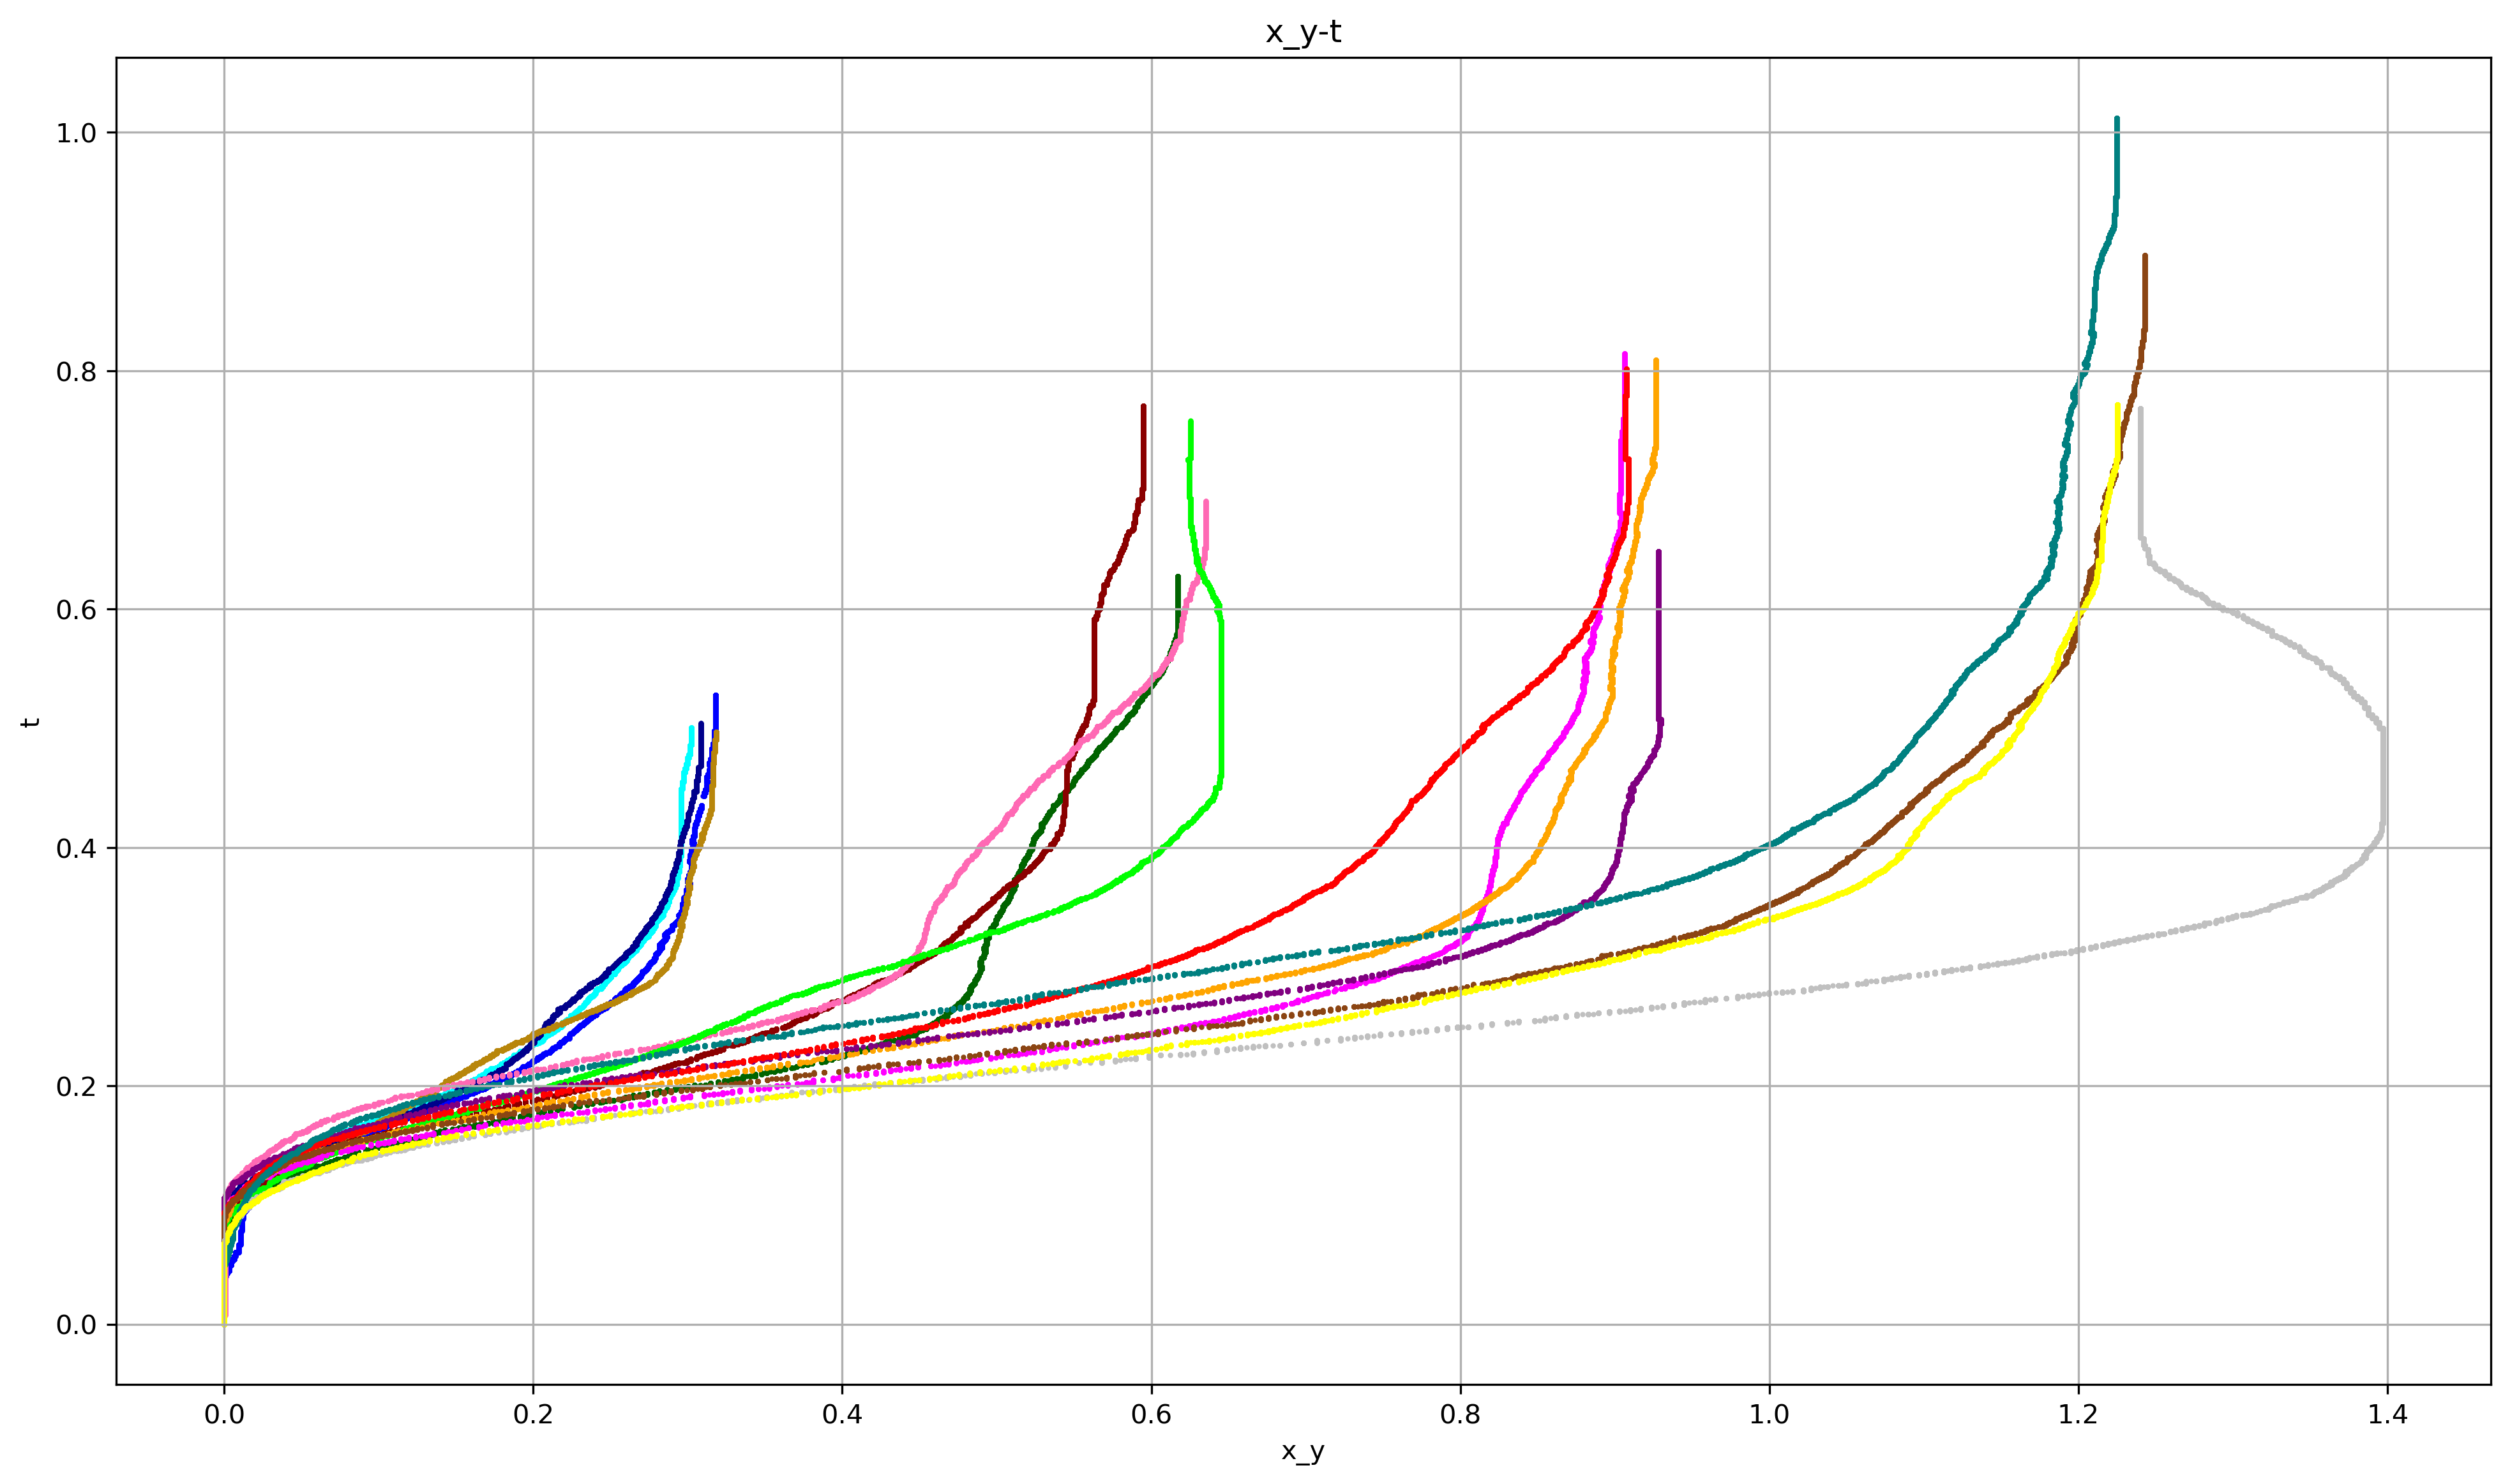

In [341]:
plotdata(Track,'x_y','t')

16


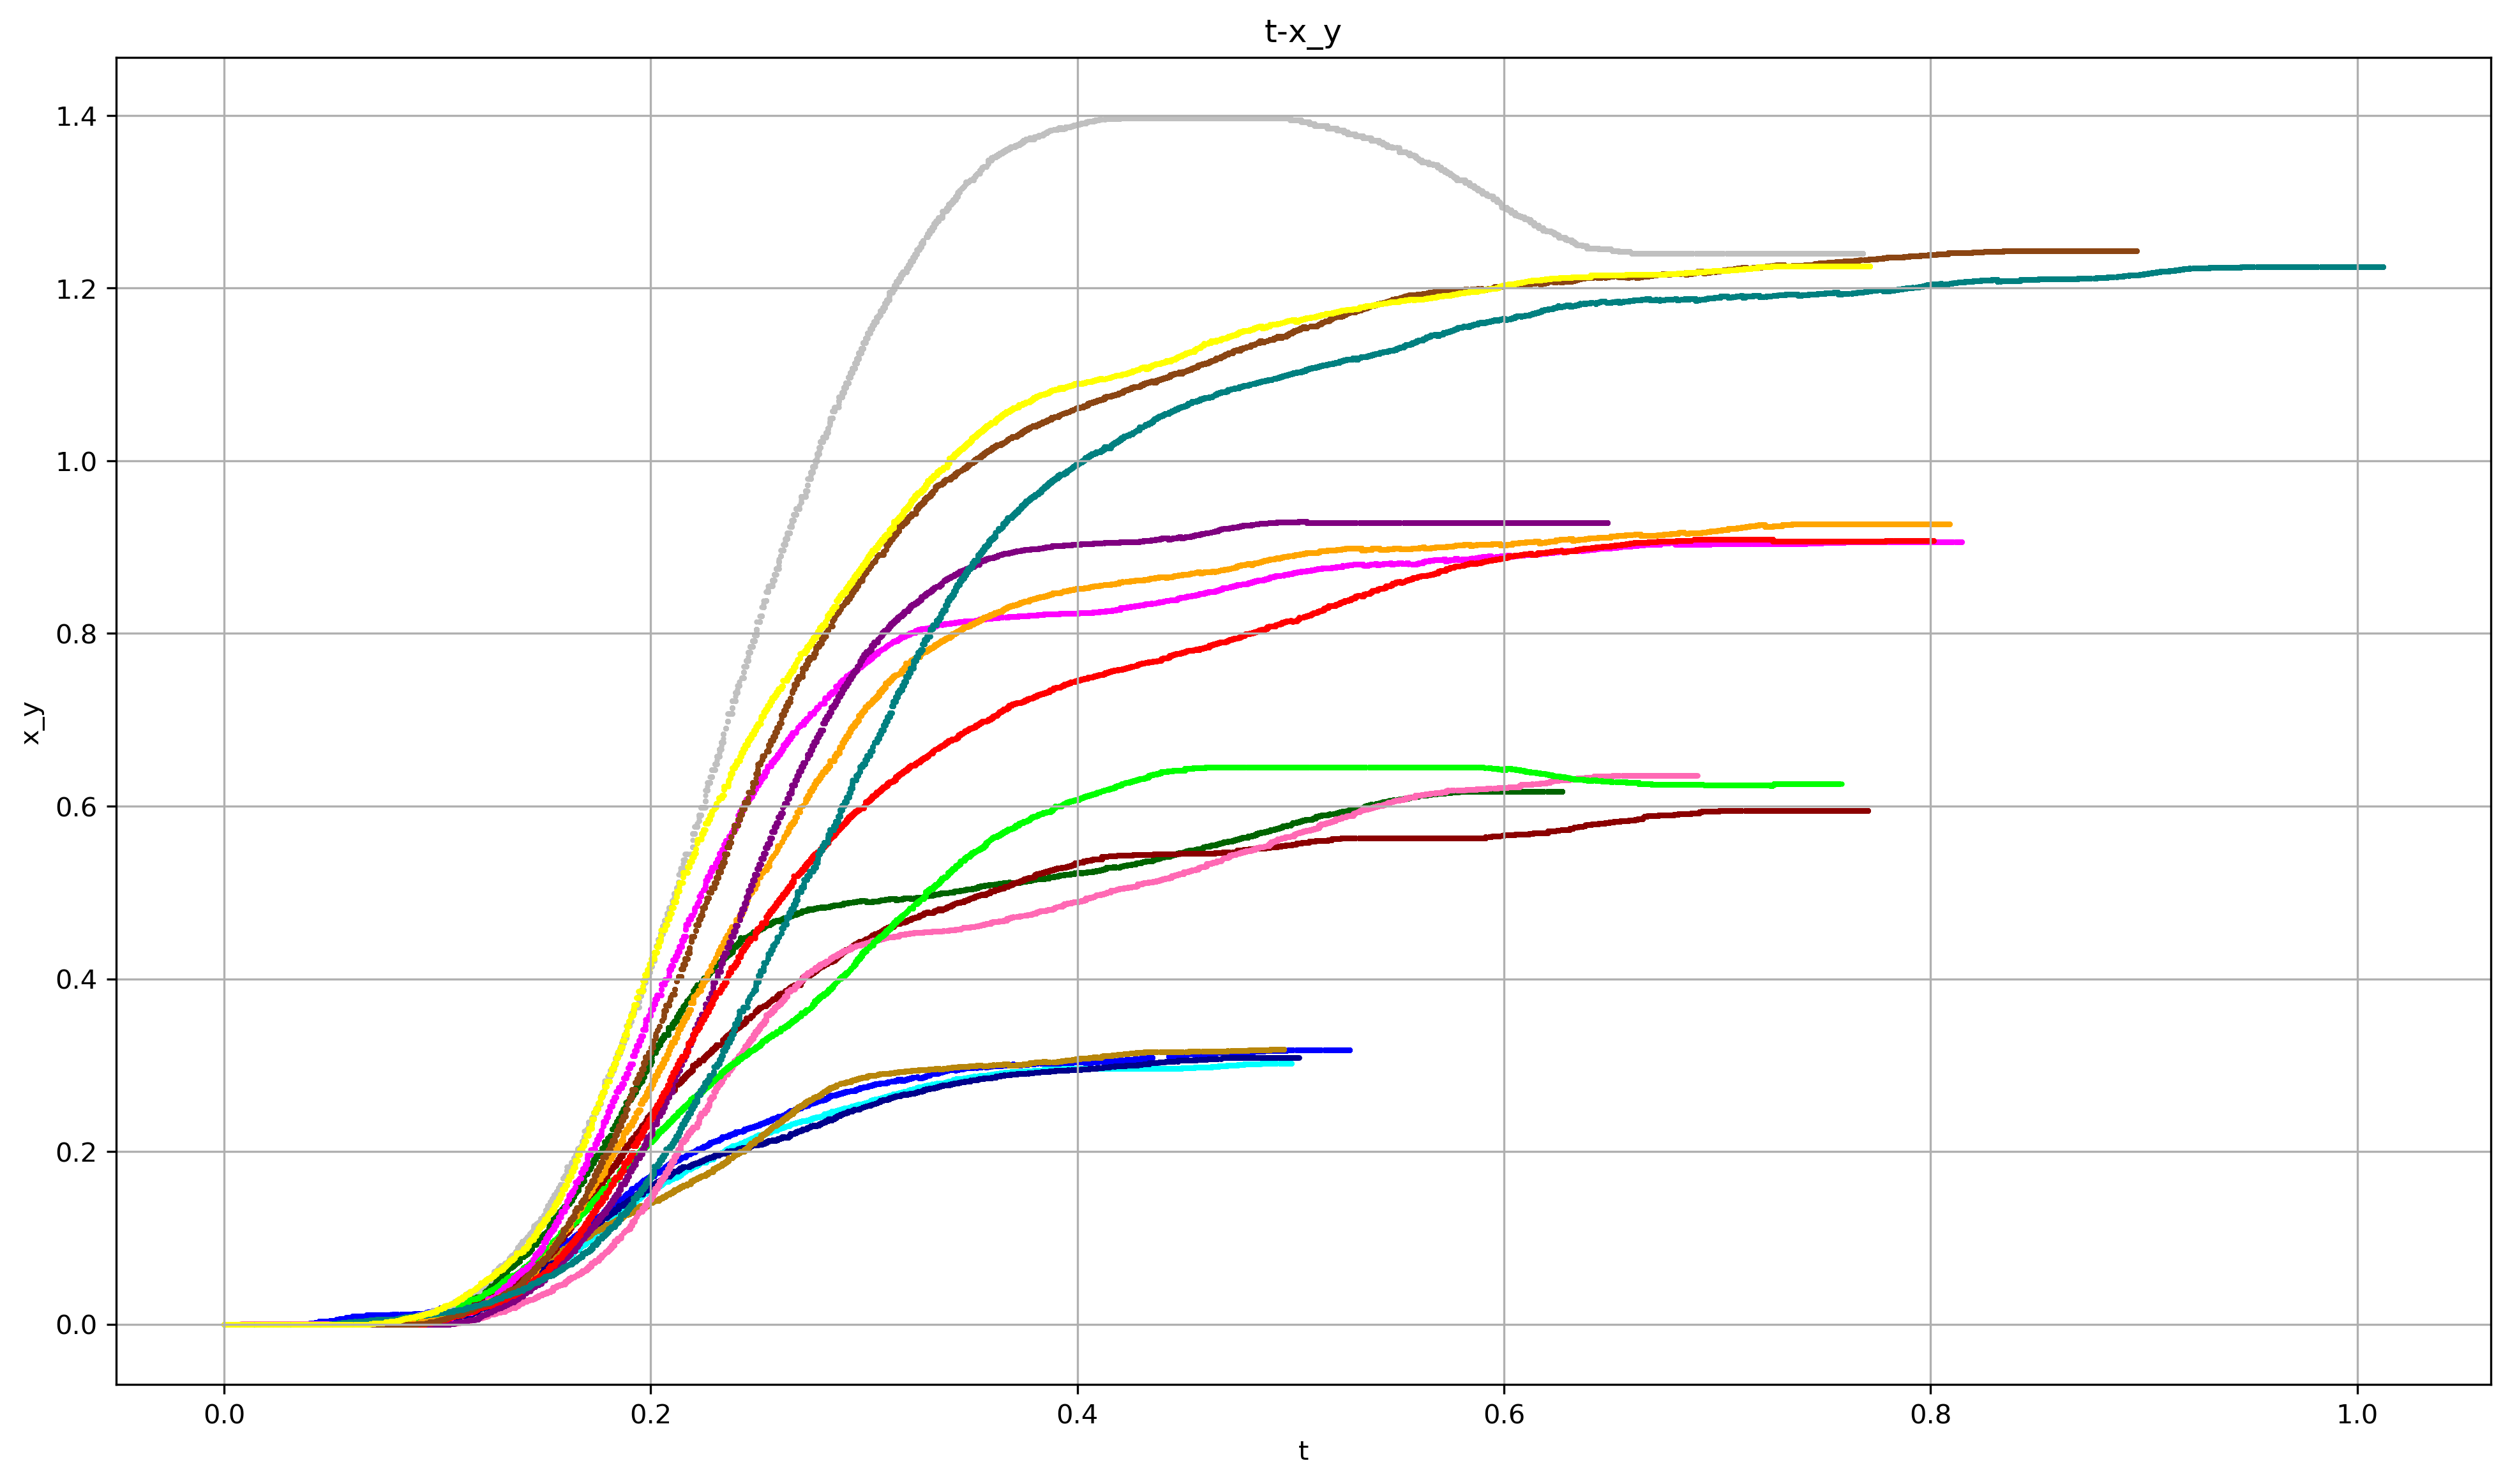

In [342]:
plotdata(Track,'t','x_y')

6.绘制t,s的散点图

16


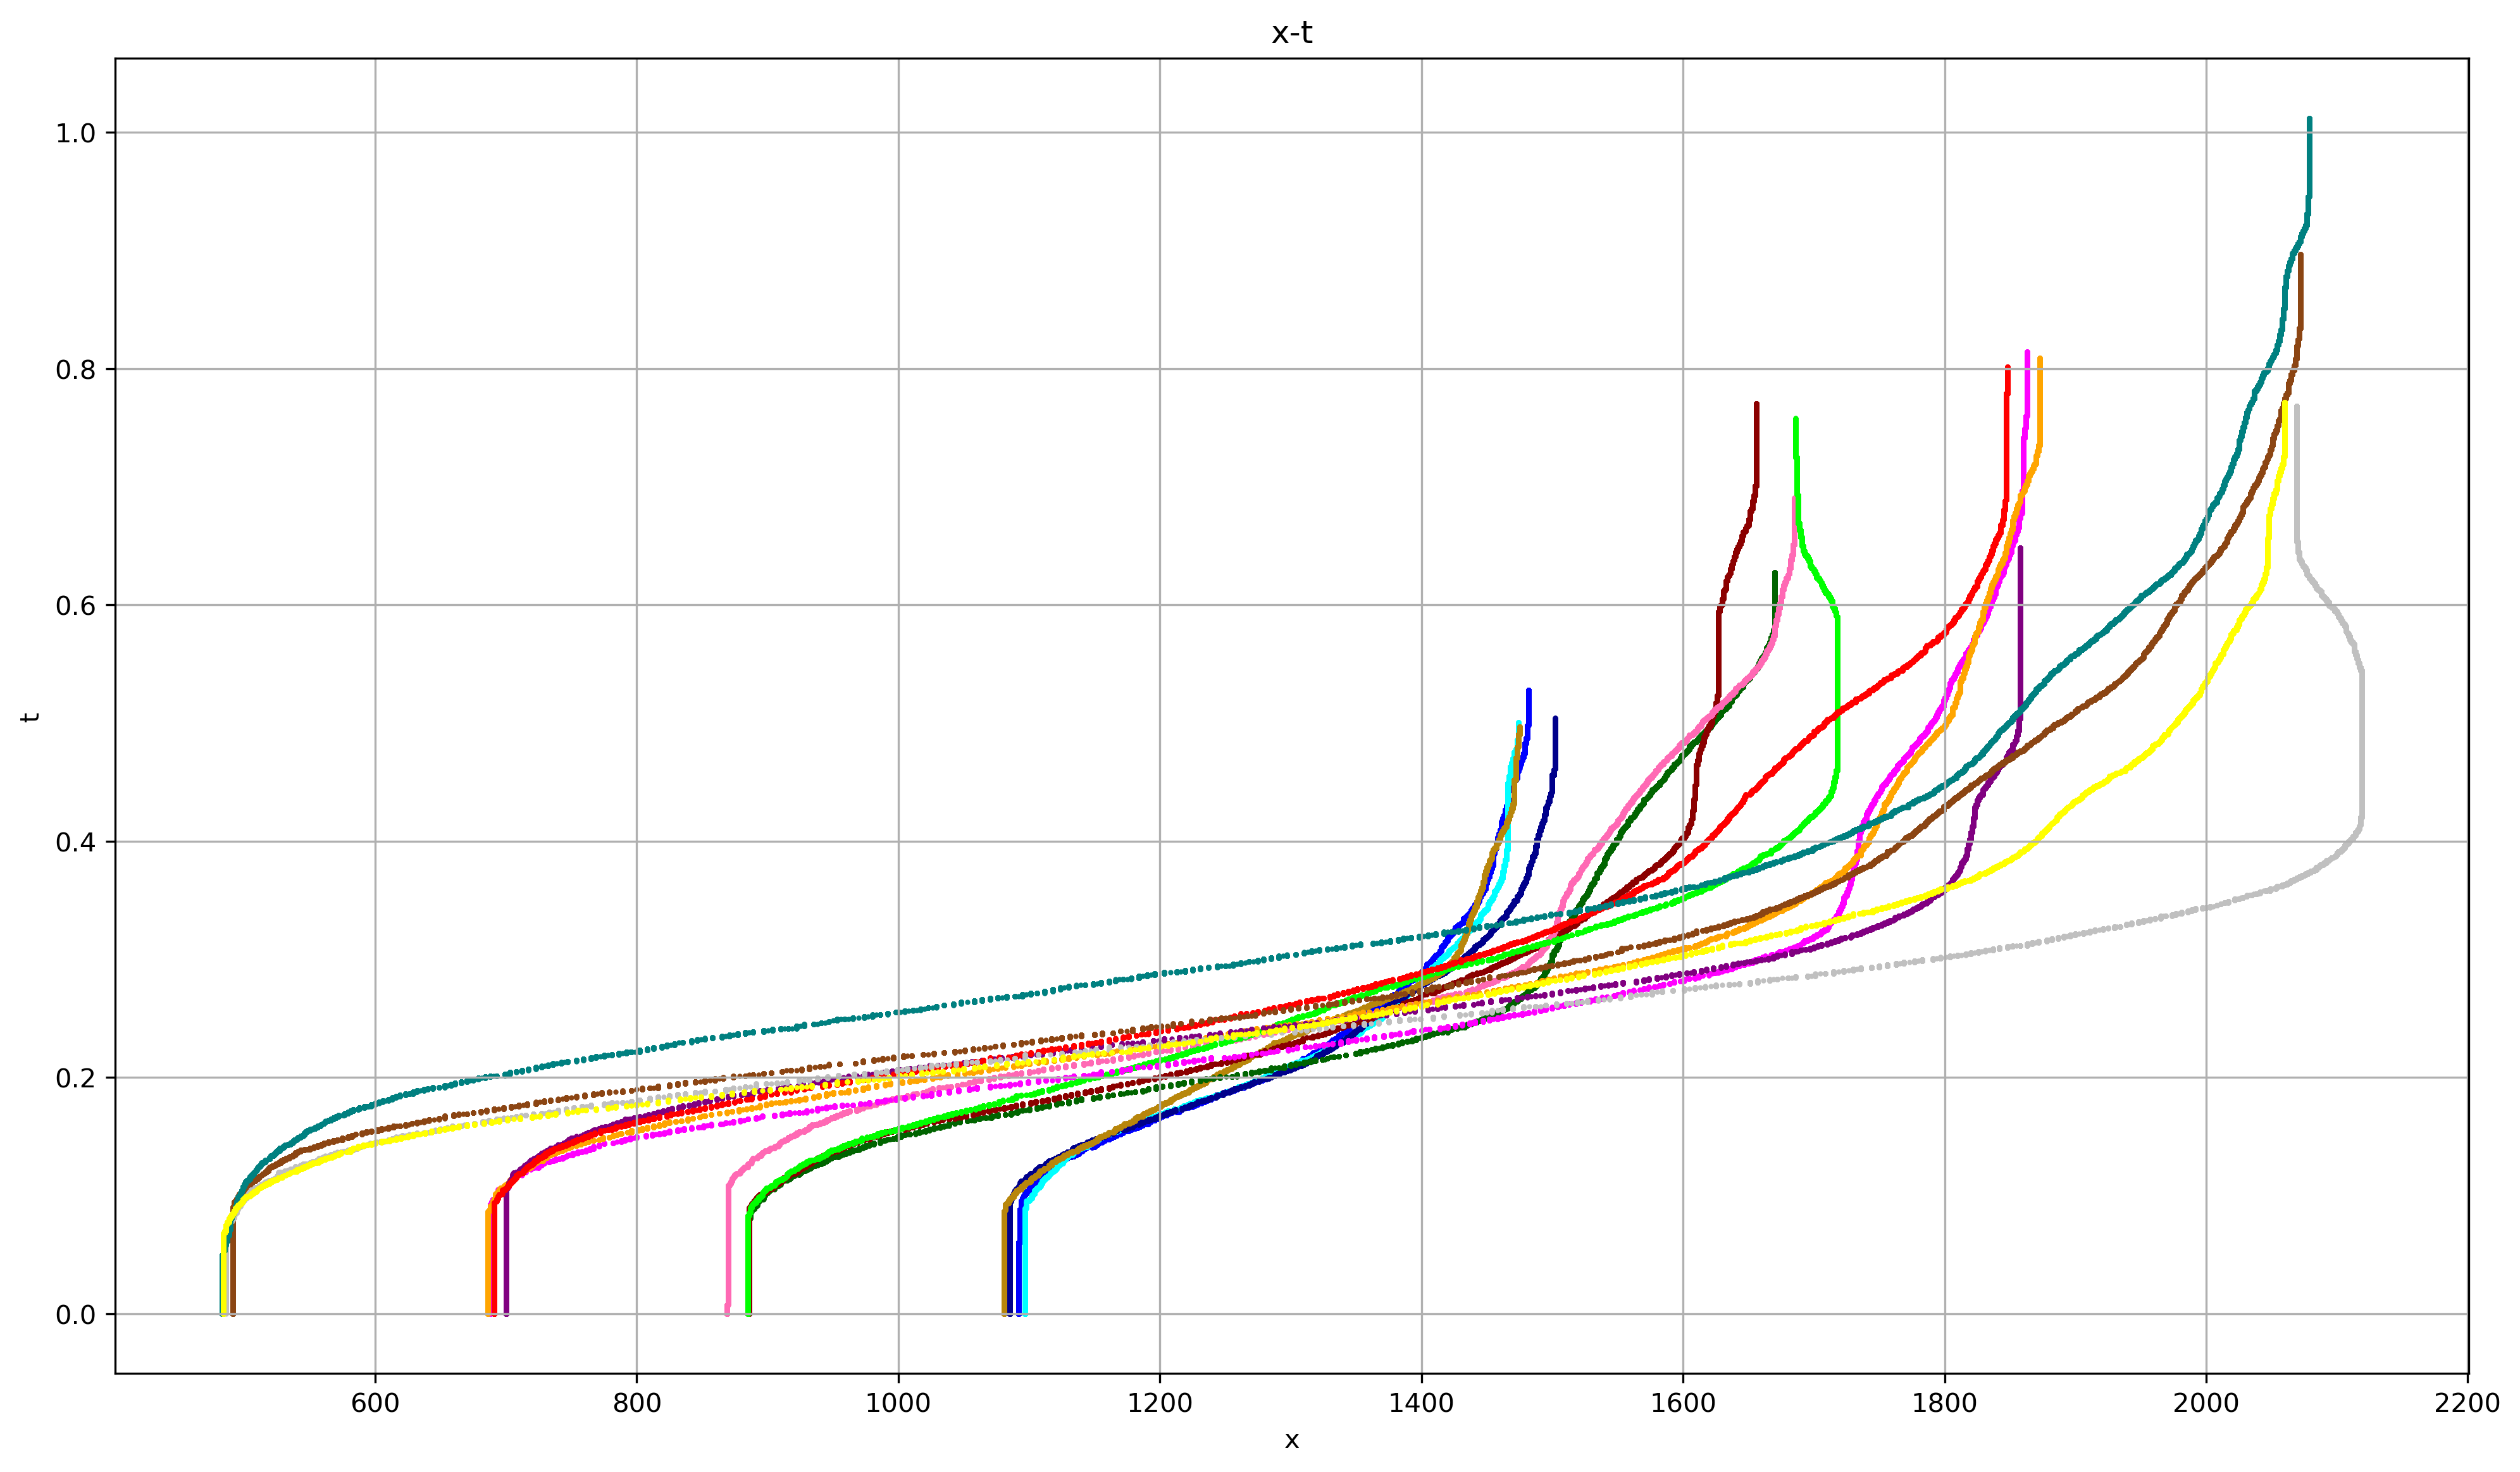

In [343]:
plotdata(Track,'x','t')

16


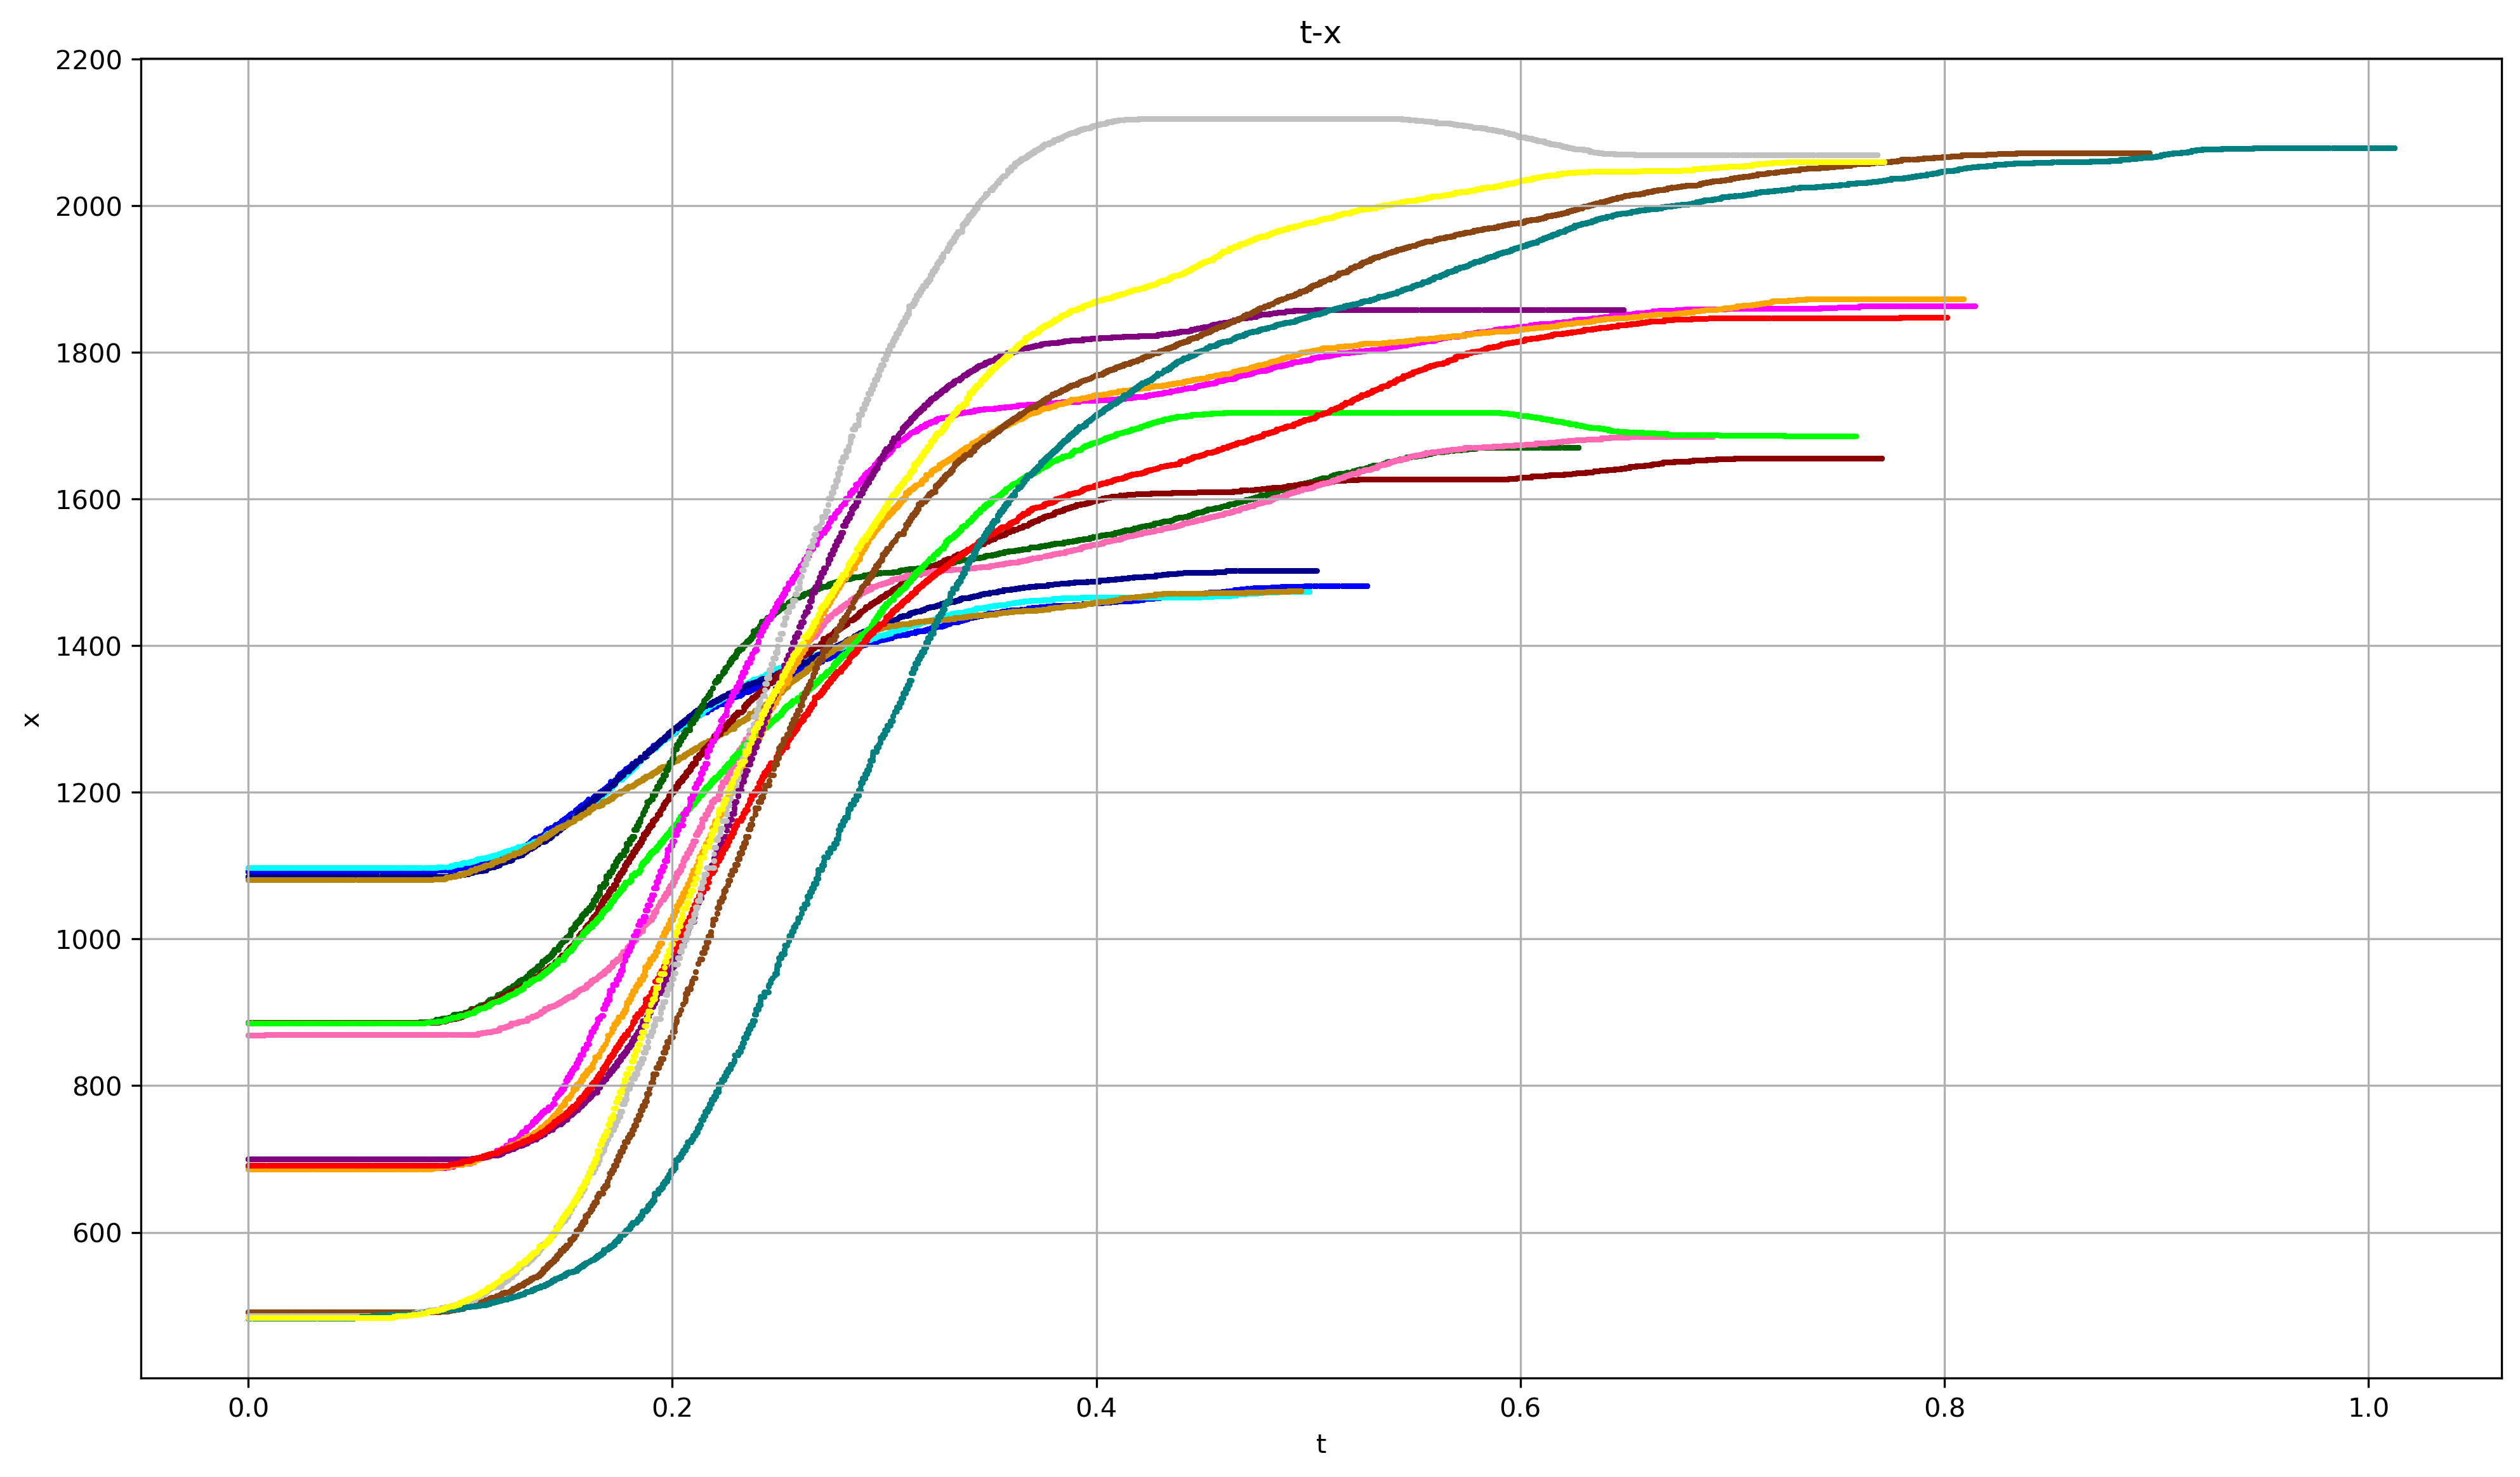

In [344]:
plotdata(Track,'t','x')

7.绘制s,v的散点图   

16


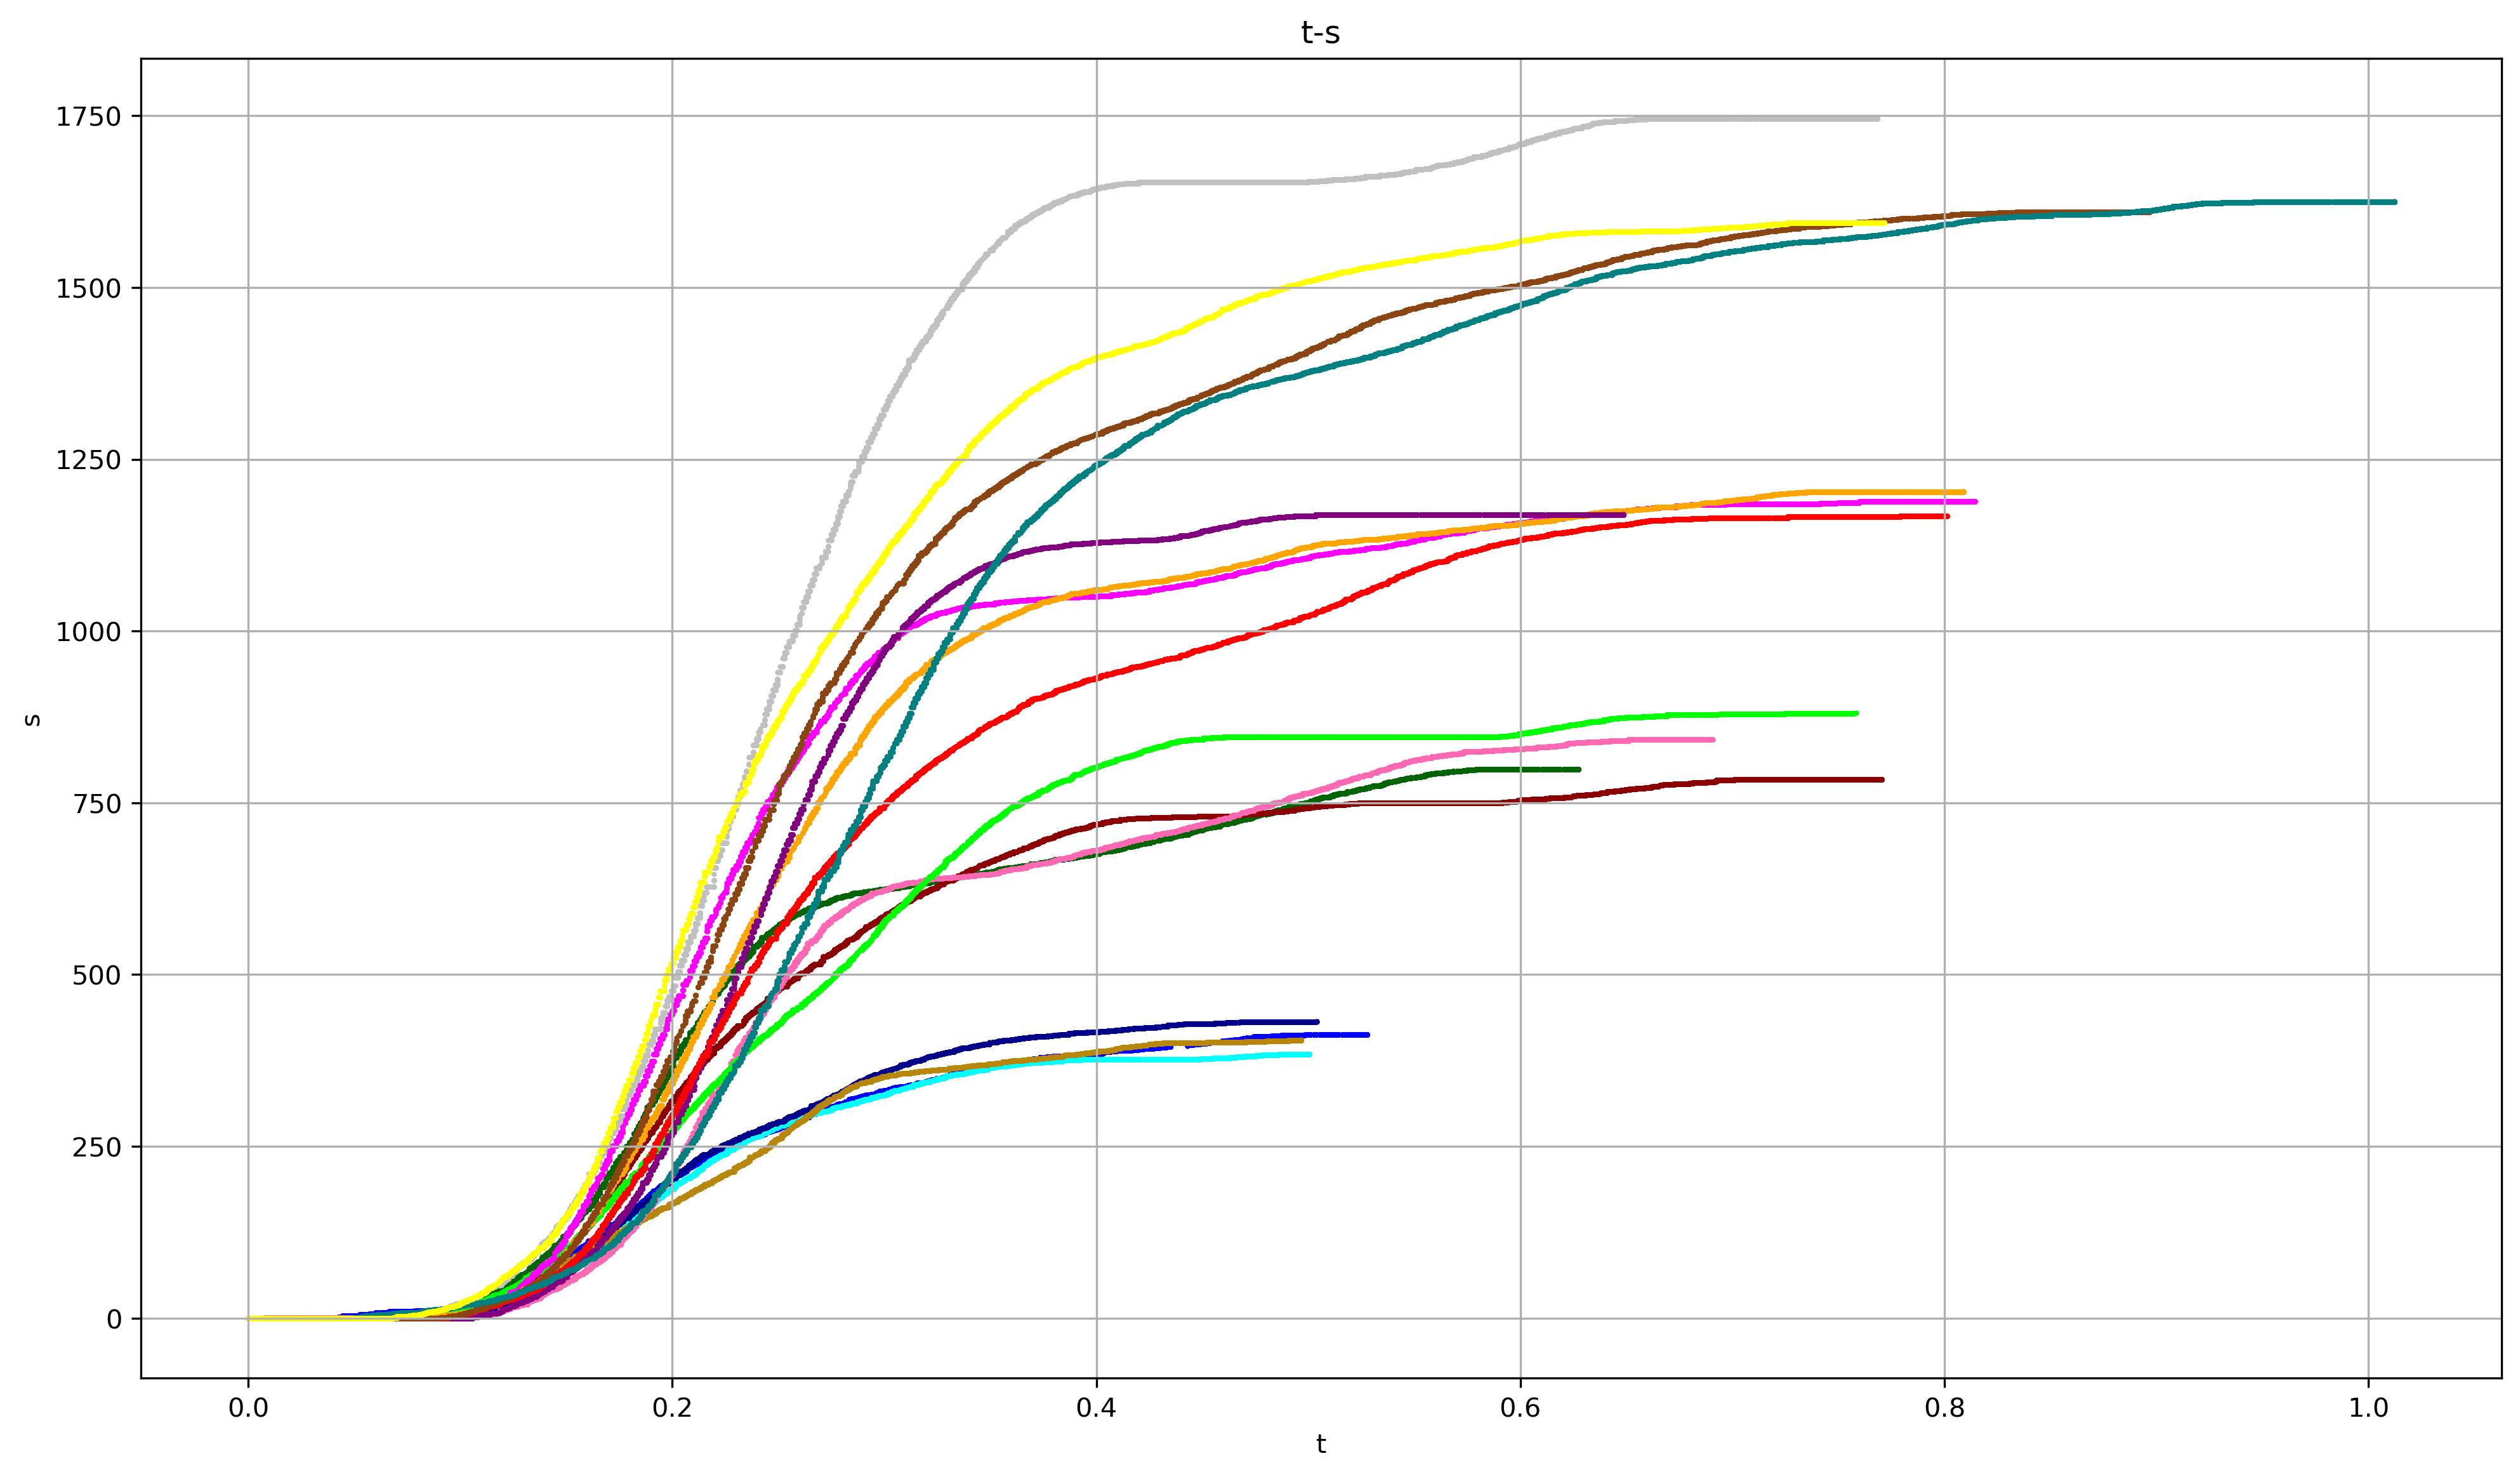

In [345]:
plotdata(Track,'t','s')

16


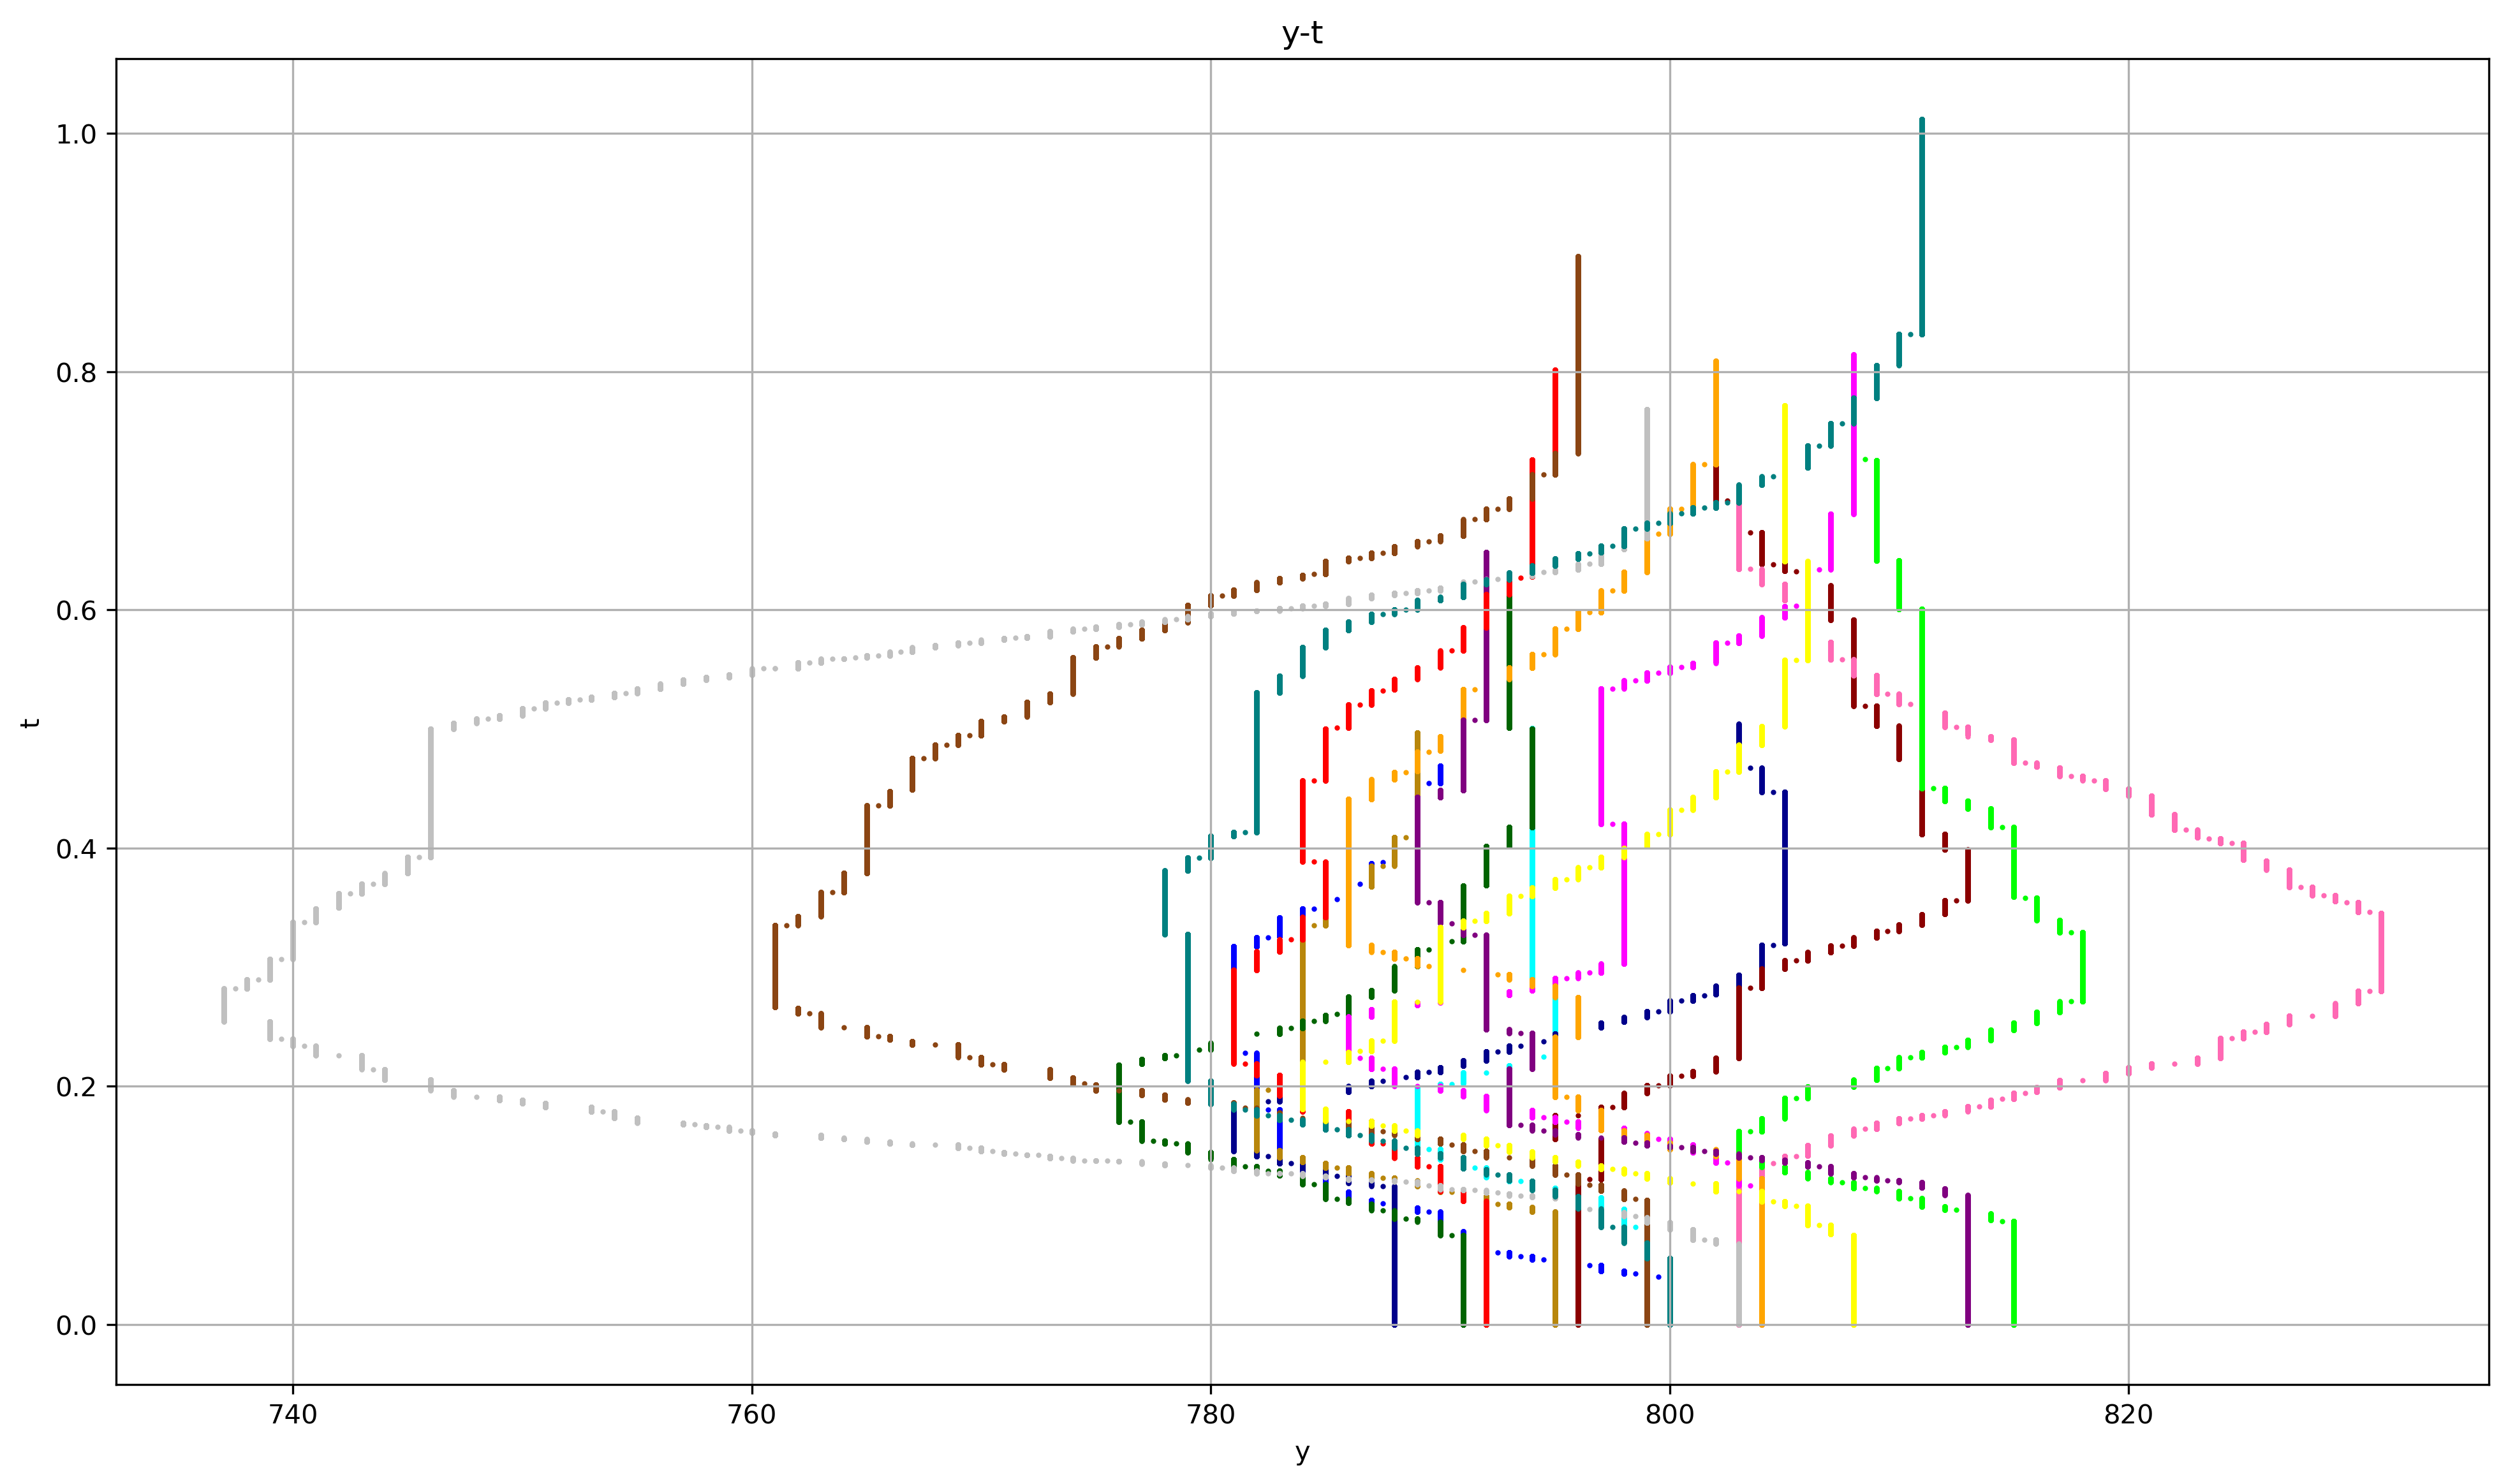

In [346]:
plotdata(Track,'y','t')

16


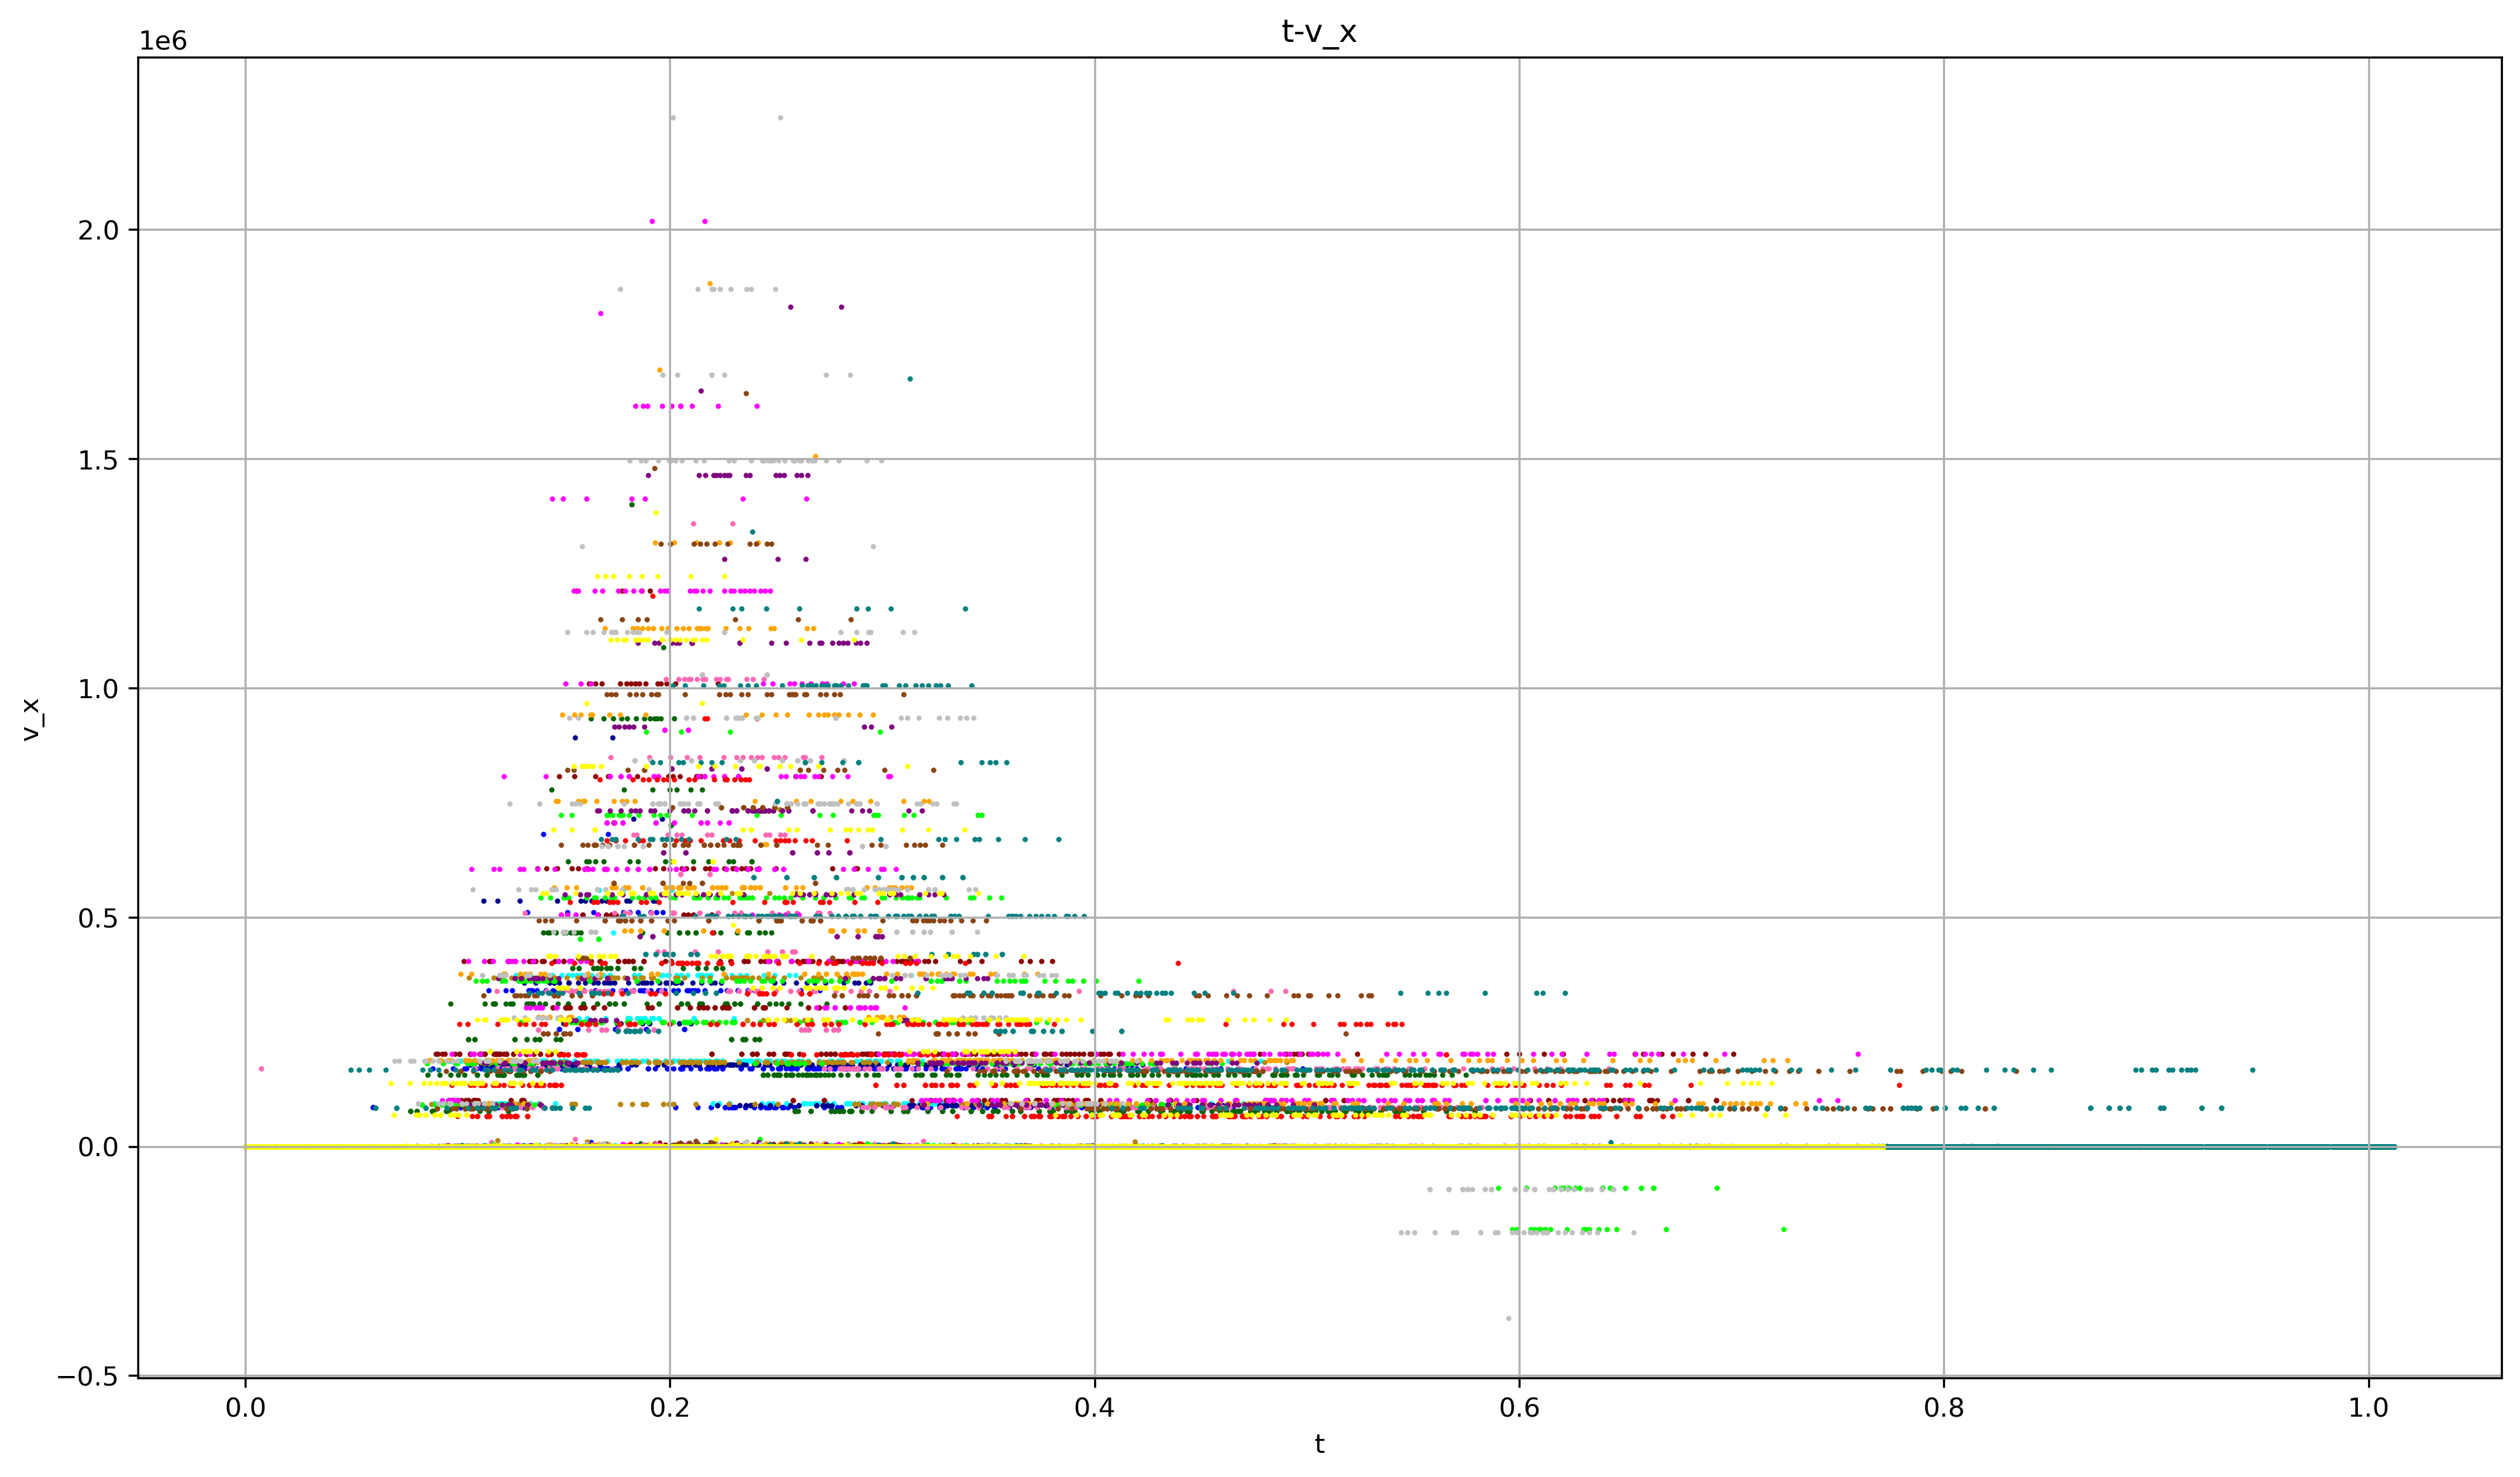

In [347]:
plotdata(Track,'t','v_x')